<a href="https://colab.research.google.com/github/projectrepo2003/Autism-Spectrum-Disorder-Prediction/blob/main/AutismPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Importing the dependencies**

In [ ]:
import numpy as np
import pandas as pd #read our csv into a df and do some processing on it
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder #to work with categorical features
from imblearn.over_sampling import SMOTE
#as our dataset has class imbalance present in it, we can perform oversampling using this module
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
#cross_val_score: instead on relying on a single accuracy score, we can do a cross validation on 2 or more different scores
#randomizedsearchCV: to perform hyper-parameter tuning on the three diff models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle #to save our model

**Column information:**

ID - ID of the patient

A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool

age - Age of the patient in years

gender - Gender of the patient

ethnicity - Ethnicity of the patient

jaundice - Whether the patient had jaundice at the time of birth

autism - Whether an immediate family member has been diagnosed with autism

contry_of_res - Country of residence of the patient

used_app_before - Whether the patient has undergone a screening test before

result - Score for AQ1-10 screening test

age_desc - Age of the patient(the value is constant here, it doesnt have any effect on the target, thus it can be removed during preprocessing)

relation - Relation of patient who completed the test

Class/ASD(Autism Spectrum Disorder)- Classified result as 0 or 1. Here 0 represents No Autism and 1 represents Autism.

**2. Data Loading and Understanding**

In [ ]:
#reading the csv file into pandas dataframe
df = pd.read_csv('drive/MyDrive/train.csv')

Initial Inspection

In [ ]:
df.shape

(800, 22)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,...,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,...,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,...,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,...,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,...,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
#display all the columns of a dataframe
pd.set_option('display.max_columns', None)

In [ ]:
df.info()
#categorical columns with string are represented as object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
#converting age column data type from float to int
df['age'] = df['age'].astype(int)

In [ ]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
for col in df.columns:
  numerical_features = ['ID', 'age', 'result']
  if col not in numerical_features:
    print(col, df[col].unique())
    print('-'*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [ ]:
#dropping ID and age_desc column
df = df.drop(columns=['ID', 'age_desc'])

In [ ]:
df.shape

(800, 20)

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#define the mapping dictionary for country names
mapping = {
    'Viet Nam':'Vietnam',
    'AmericanSamoa':'United States',
    'Hong Kong':'China',
    'Aruba':'Netherlands'
}
#replace value in the country column
df['contry_of_res'] = df['contry_of_res'].replace(mapping)

In [ ]:
df['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Sri Lanka',
       'Russia', 'Bolivia', 'Azerbaijan', 'Armenia', 'Serbia', 'Ethiopia',
       'Sweden', 'Iceland', 'China', 'Angola', 'Germany', 'Spain',
       'Tonga', 'Pakistan', 'Iran', 'Argentina', 'Japan', 'Mexico',
       'Nicaragua', 'Sierra Leone', 'Czech Republic', 'Niger', 'Romania',
       'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'], dtype=object)

In [ ]:
#checking target column class distribution
df['Class/ASD'].value_counts() #huge imbalance is seen here
#to address this issue, we can do under-sampling, over-sampling, etc
# we will do over-sampling to solve the imbalance

,count
Class/ASD,
0,639
1,161


**Insights:**
1. Missing values in ethnicity and relation
2. age_desc column has only 1 unique value, so it is removed as it doesnt affect the target
3. fixed the country names
4. Identified class imbalance in target column

**3. Exploratory Data Analysis (EDA)**

In [ ]:
df.shape

(800, 20)

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
df.head(2)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0


In [ ]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**: Analyzing individual variables

For Numerical Columns:
- age
- result




In [ ]:
#set the desired theme
sns.set_theme(style='darkgrid')

**Distribution Plots**

Mean: 27.96375
Median: 24.0


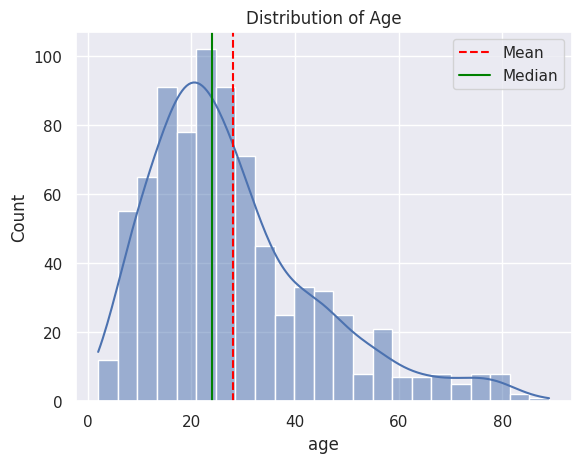

In [ ]:
#histogram for 'age'
sns.histplot(df['age'], kde=True) #kde: draw a smooth curve above the histplot
plt.title('Distribution of Age')

#calculate mean and median
age_mean = df['age'].mean()
age_median = df['age'].median()

print(f'Mean: {age_mean}')
print(f'Median: {age_median}')

#add vertical lines for mean and median
plt.axvline(age_mean, color='red', linestyle='--', label='Mean')
plt.axvline(age_median, color='green', linestyle='-', label='Median')
plt.legend()

plt.show()
#right-skew: mean will be more than median as mean is affected by the outliers

we look at distribution as most model want data that follows normal distribution

in that case we will perform standard scaler (e.g logistic regression, SVM, etc)

here, we are working with tree-based model so it wont be an issue here

Mean: 8.537303106501248
Median: 9.605299308


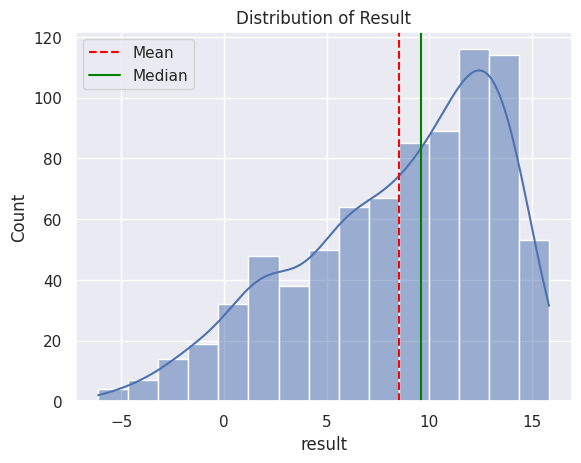

In [ ]:
#histogram for 'result'
sns.histplot(df['result'], kde=True) #kde: draw a smooth curve above the histplot
plt.title('Distribution of Result')

#calculate mean and median
result_mean = df['result'].mean()
result_median = df['result'].median()

print(f'Mean: {result_mean}')
print(f'Median: {result_median}')

#add vertical lines for mean and median
plt.axvline(result_mean, color='red', linestyle='--', label='Mean')
plt.axvline(result_median, color='green', linestyle='-', label='Median')
plt.legend()

plt.show()
#left-skewed: but not that much skew. the mean value < median.

**Box plots for identifying outliers in the numerical columns**

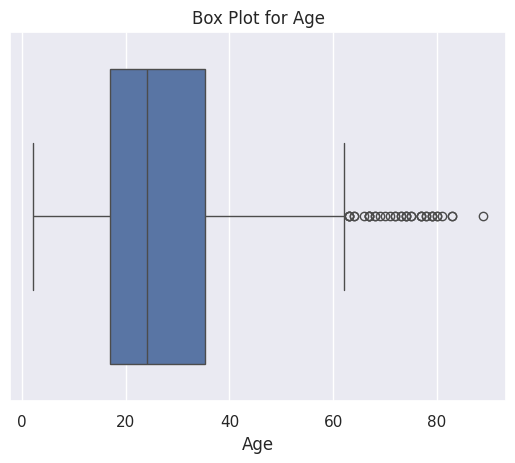

In [ ]:
#Box plot for 'age'
sns.boxplot(x=df['age'])
plt.title('Box Plot for Age')
plt.xlabel('Age')
plt.show()
#circles represents the outliers
#line between the two boxes represents the median (50th percentile value)
#Q1 (25th percentile)
#Q3 (75th percentile)
#Q3-Q1 = IQR (inter-quartile range)
#1.5 times the IQR, wtv comes before or after that becomes the outlier
#as the distribution was right skewed; thus the outliers are present on the right side

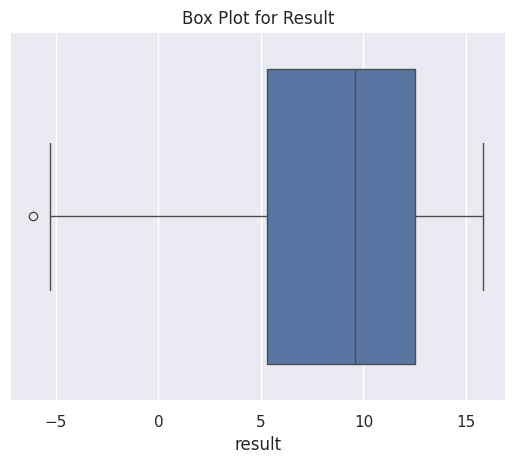

In [ ]:
#Box plot for 'result'
sns.boxplot(x=df['result'])
plt.title('Box Plot for Result')
plt.xlabel('result')
plt.show()
#here, only one outlier is present on the left side

In [ ]:
#counting the outliers using IQR method - Age
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
#we can replace these outliers with median, not mean- because mean is getting affected, median isnt.

In [ ]:
len(age_outliers)

39

In [ ]:
#counting the outliers using IQR method - result
Q1 = df['result'].quantile(0.25)
Q3 = df['result'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df['result'] < lower_bound) | (df['result'] > upper_bound)]

In [ ]:
len(result_outliers)

1

Sometimes, outliers might hold some meaning or importance which we get to know through SME (Subject Matter Expert).

But most of the times, the outliers are either dropped or we do imputation (replace them with mean or median).

**Univariate Analyss of Categorical Columns**

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

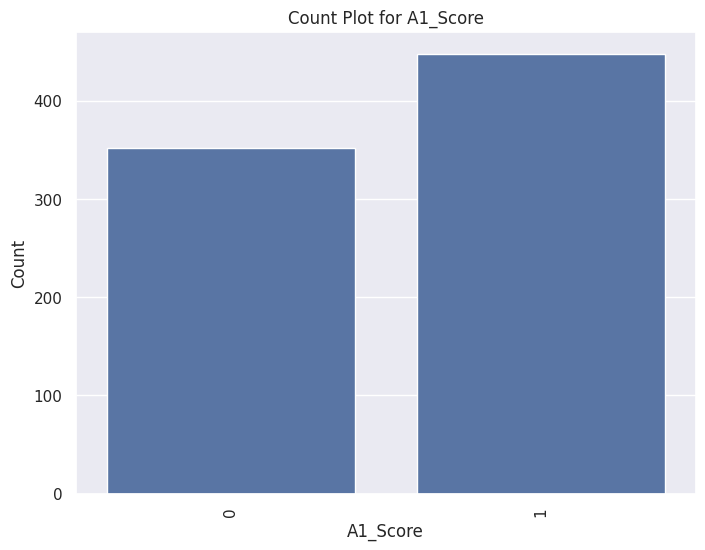

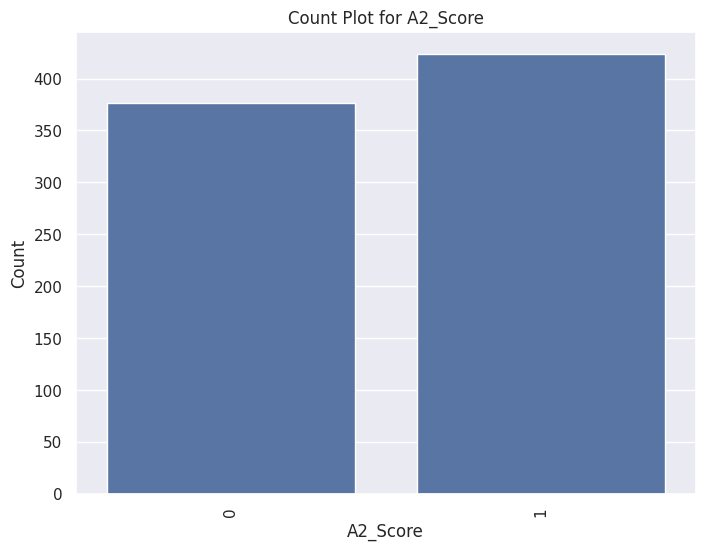

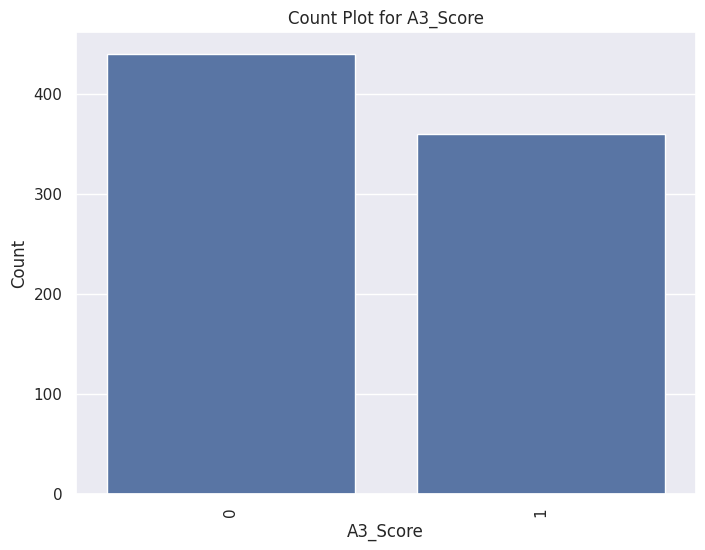

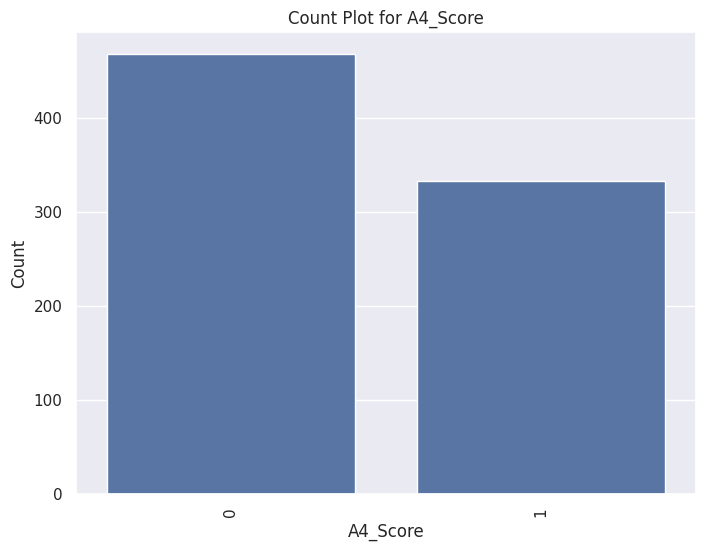

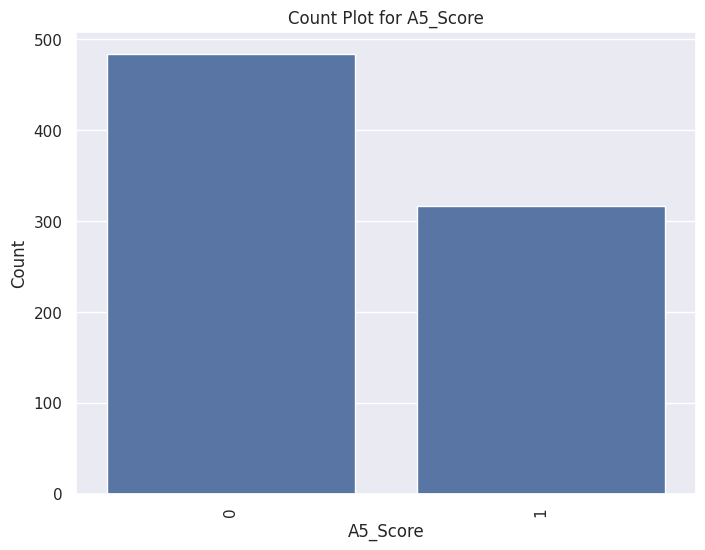

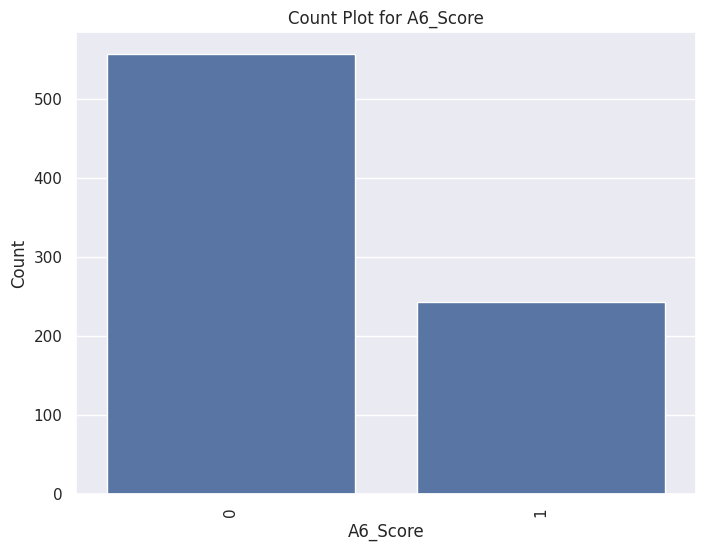

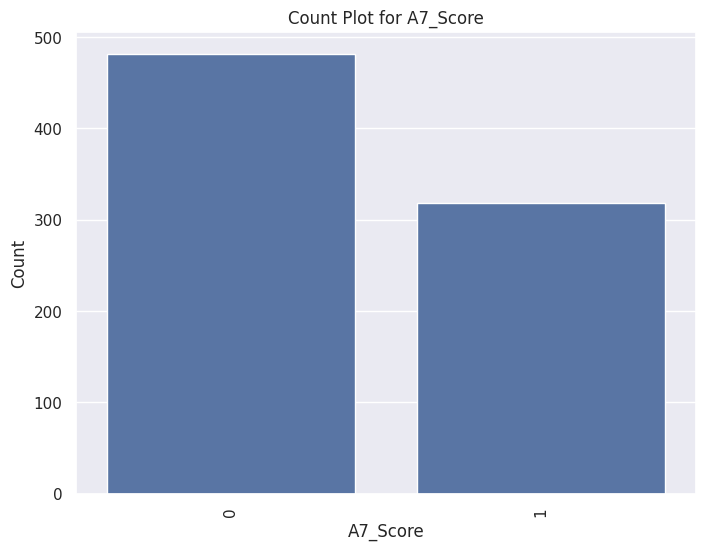

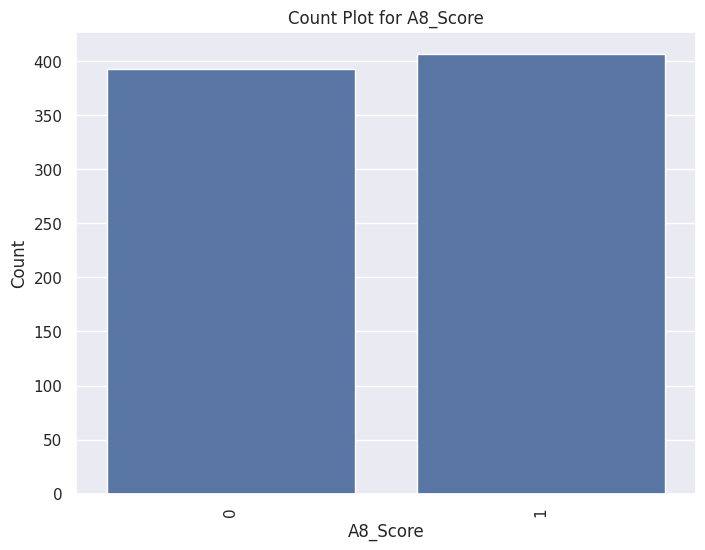

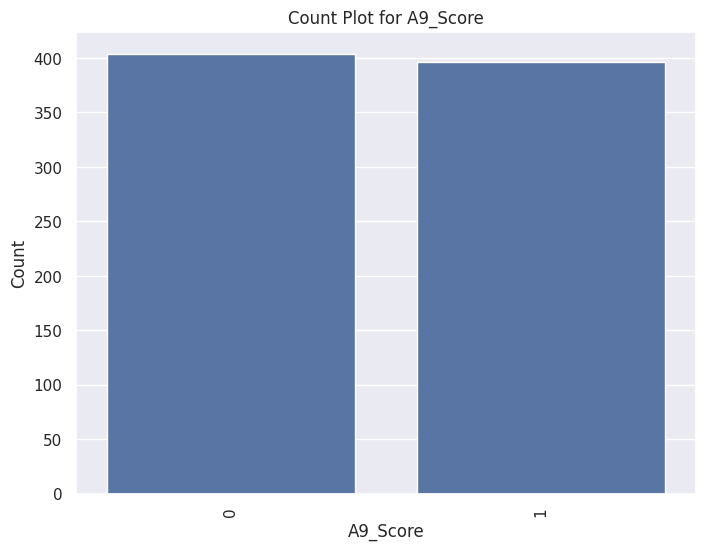

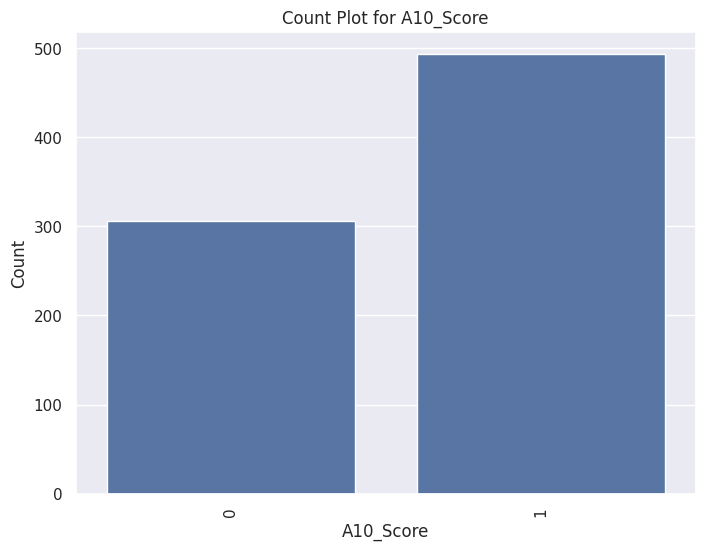

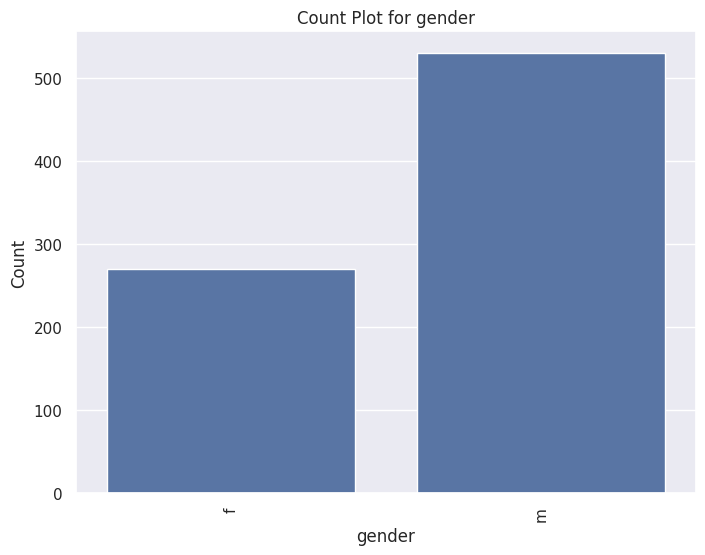

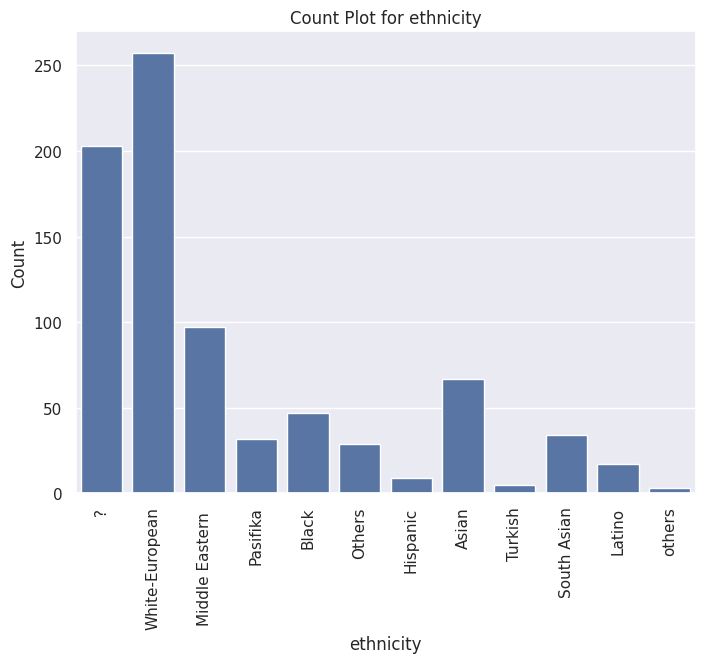

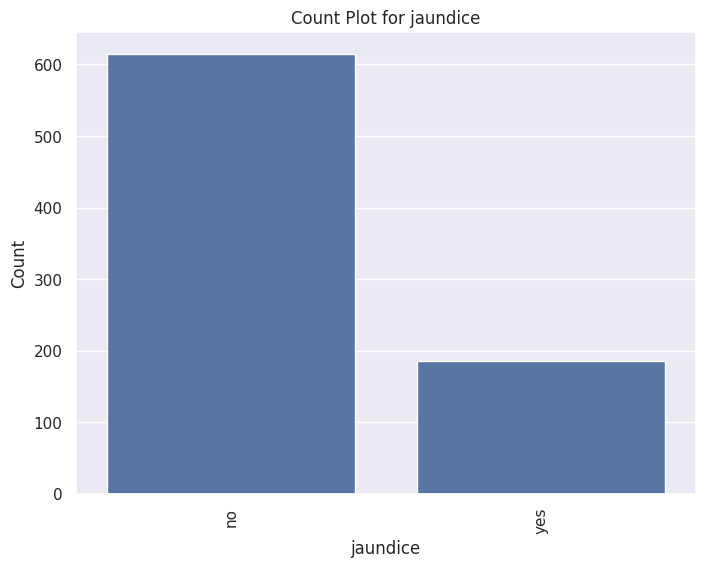

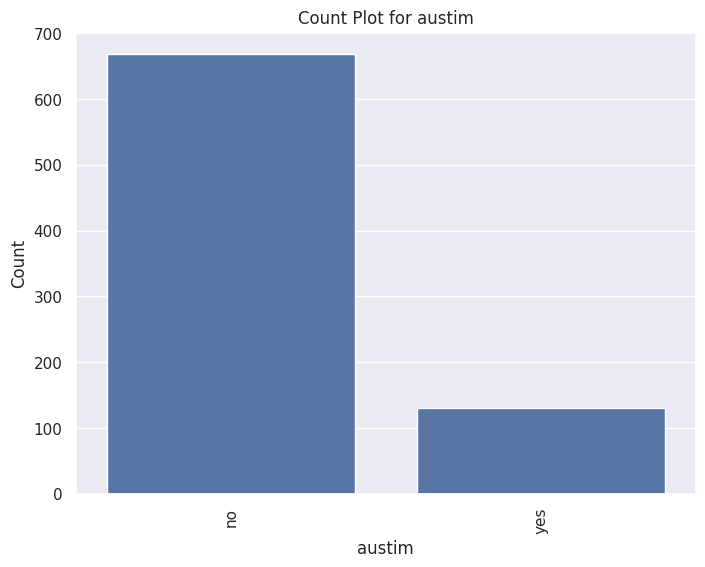

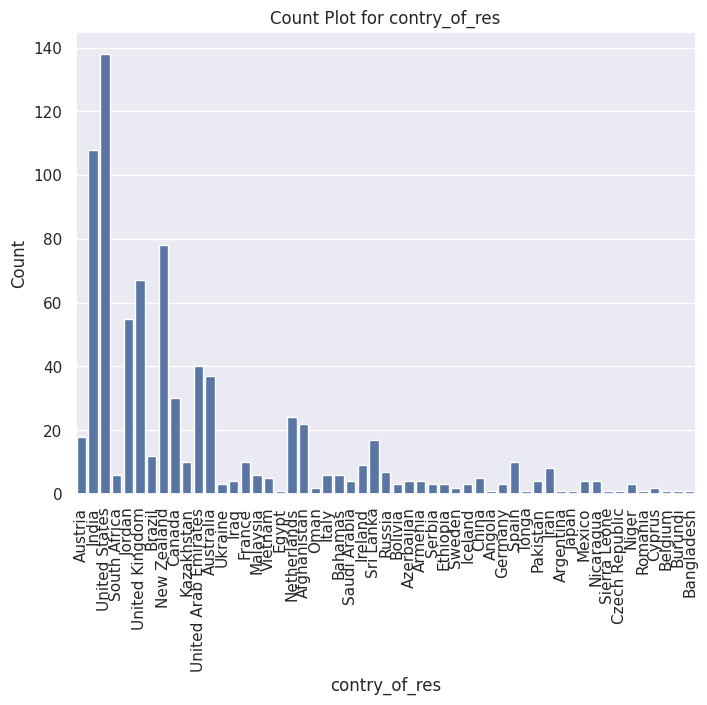

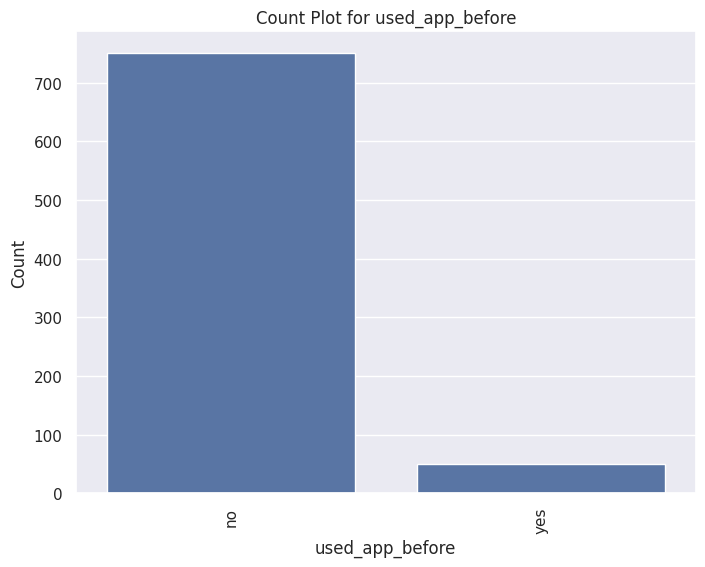

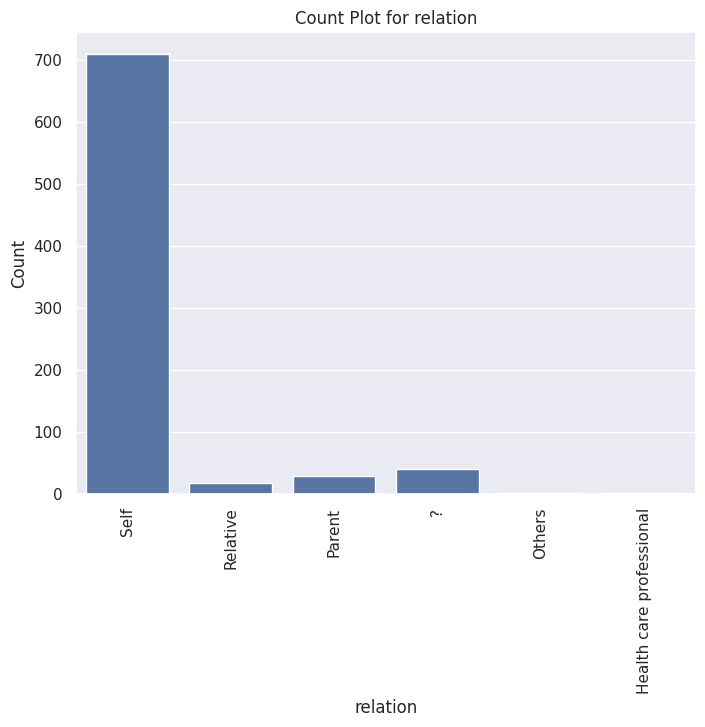

In [ ]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender','ethnicity',
        'jaundice', 'austim', 'contry_of_res', 'used_app_before','relation']
for col in categorical_columns:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=df[col])
  plt.title(f'Count Plot for {col}')
  plt.xlabel(col)
  plt.xticks(rotation=90)
  plt.ylabel('Count')
  plt.show()

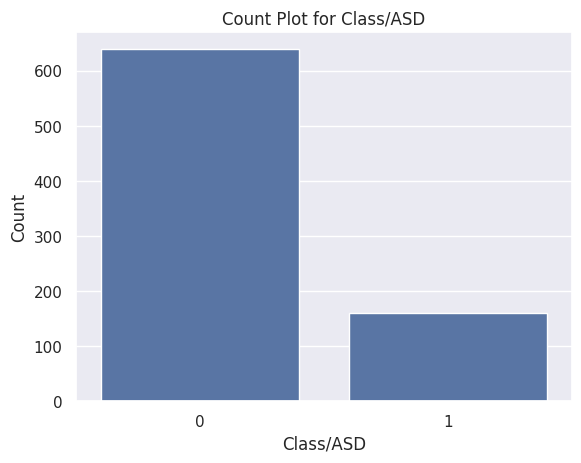

In [ ]:
#countplot for target column (class/ASD)
sns.countplot(x=df['Class/ASD'])
plt.title('Count Plot for Class/ASD')
plt.xlabel('Class/ASD')
plt.ylabel('Count')
plt.show()

In [ ]:
df['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


Now, we will handle ? values present in ethinicity and relation columns

In [ ]:
# we cant use fillna as we have ?
df['ethnicity'] = df['ethnicity'].replace({"?":"Others", "others":"Others"})

In [ ]:
df['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
df['relation'] = df['relation'].replace({
    '?':'Others', 'Relative':'Others', 'Parent':'Others',
    'Health care professional':'Others'
})

In [ ]:
df['relation'].unique()

array(['Self', 'Others'], dtype=object)

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


Ordinal categories: when categories have some order in it. (e.g, movie rating)

Nominal categories: when categories are unique.

**Label Encoding**

In [ ]:
#this process needs to be done on the entire dataset
#firstly, we need to identify columns with datatype as object
object_columns = df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
#initialize a dictionary to store the encoders
encoders = {}
#apply label encoding and store the encoders
for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder #saving the encoder for this column
#save the encoders as a pickle file
with open('encoders.pkl', 'wb') as f:
  pickle.dump(encoders, f)
#we r saving as what if we want to apply this transformation on an unknown data

In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,5,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,22,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,51,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,51,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,43,0,-4.777286,1,0


Label Encoding is sufficient for tree based models.

One-hot encoding is better but it increases the dimentionality of the dataset which can create issues.

**Bivariate Analysis**

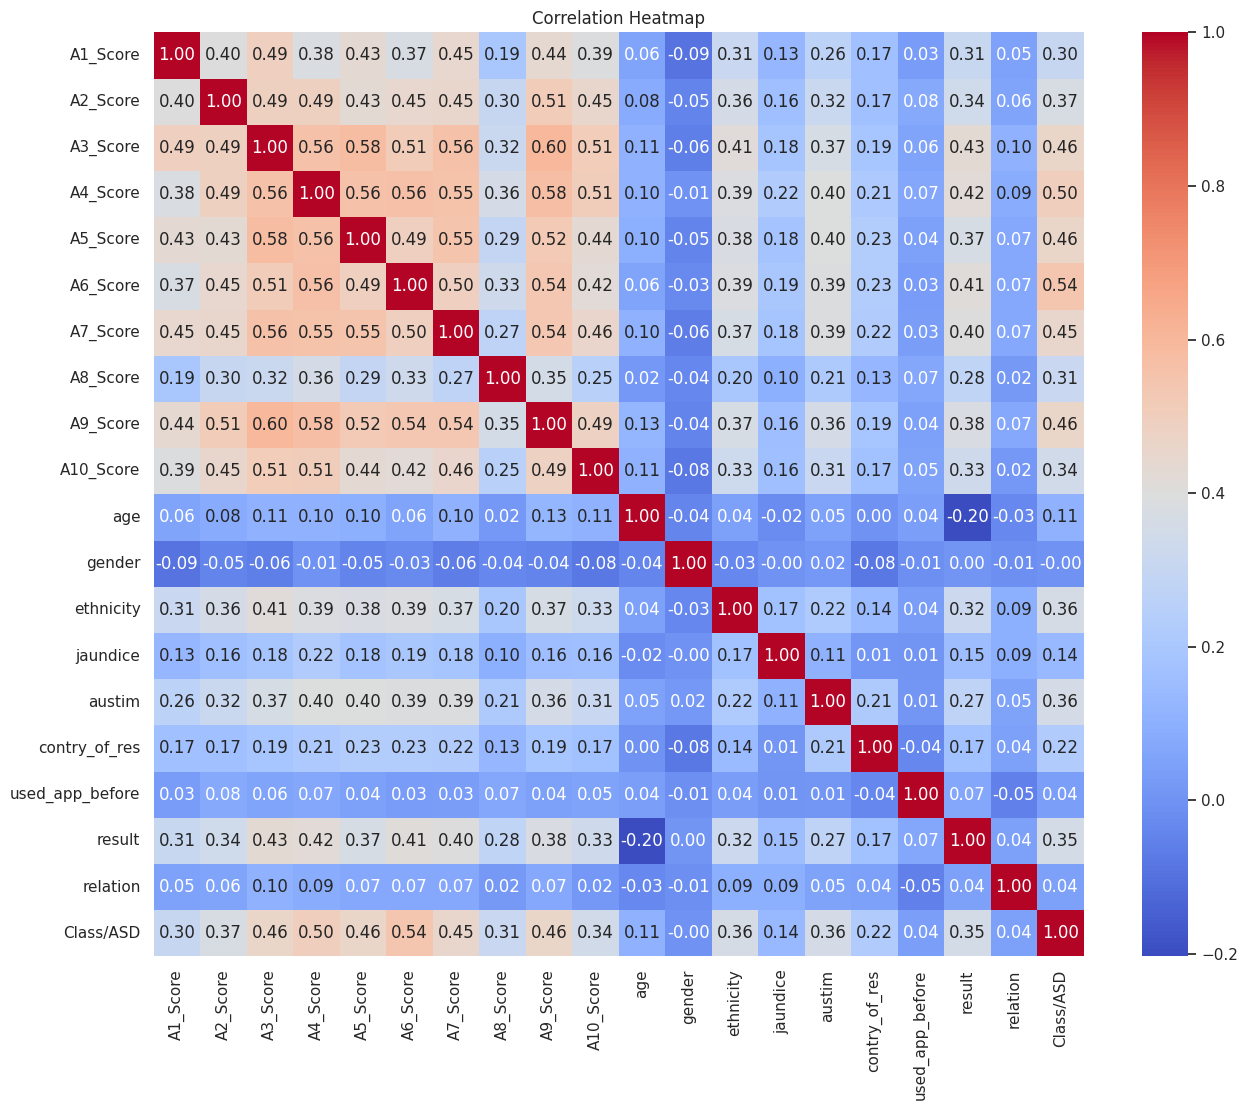

In [ ]:
#correlation heatmap/matrix: gives relation between two columns
#it is specifically used for feature selection wherein we can remove highly correlated features(either -ve or +ve)

plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f') #fmt-> number of decimal values
plt.title('Correlation Heatmap')
plt.show()

#dark colors indicate highly pos/neg correlation (ignoring the diagonals)
#here, we dont have any highly correlated columns thus no columns to drop!

**Insights from EDA**
- There are few outliers in the numerical features (age, results)

- There is a class imbalance in the target column

- There is a class imbalance in the categorical features as well

- We dont have any highly correlated columns

- Performed Label Encoding and saved the encoders

**4. Data Preprocessing**

Handling the outliers

In [ ]:
#function to replace the outliers with median value
def replace_outliers_with_median(df, column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median = df[column].median()

  #replacing outliers with median
  df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

  return df

In [ ]:
#replace outliers in the 'age' column
df = replace_outliers_with_median(df, 'age')
#replace outliers in the 'result' column
df = replace_outliers_with_median(df, 'result')

In [ ]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,5,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,22,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,51,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,51,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,43,0,-4.777286,1,0


In [ ]:
df.shape

(800, 20)

Train-Test Split

In [ ]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
x = df.drop(columns=['Class/ASD'])
y = df['Class/ASD']

In [ ]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score   age  gender  ethnicity  jaundice  aust

In [ ]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
y_train.shape, y_test.shape

((640,), (160,))

In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,515
1,125


In [ ]:
y_test.value_counts() #we wont perform SMOTE on this

,count
Class/ASD,
0,124
1,36


SMOTE (Synthetic Minority OverSampling Technique)

In [ ]:
#creating its instance
smote = SMOTE(random_state=42) #for reproducibility

In [ ]:
#performing SMOTE on training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
y_train_smote.shape #because of over-sampling, we have more values

(1030,)

In [ ]:
y_train_smote.value_counts() #balanced of the classes is seen now

,count
Class/ASD,
1,515
0,515


**5. Model Training**

In [ ]:
#dictionary of classifiers
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42), #rs for reproducibility
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [ ]:
print(models)

{'Decision Tree': DecisionTreeClassifier(random_state=42), 'Random Forest': RandomForestClassifier(random_state=42), 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)}


In [ ]:
#dictionary to store the cross-validation results
cv_scores = {}
#perform 5-fold (splitting the data into 5 folds) cross validation for each model
for model_name, model in models.items():
  print(f'Training {model_name} with default parameters...')
  scores = cross_val_score(model, x_train_smote, y_train_smote,
                           cv=5, scoring='accuracy')
  cv_scores[model_name] = scores
  print(f'{model_name} cross-validation accuracy: {np.mean(scores):.2f}')
  print('-'*50)

Training Decision Tree with default parameters...
Decision Tree cross-validation accuracy: 0.86
--------------------------------------------------
Training Random Forest with default parameters...
Random Forest cross-validation accuracy: 0.91
--------------------------------------------------
Training XGBoost with default parameters...
XGBoost cross-validation accuracy: 0.90
--------------------------------------------------


In [ ]:
cv_scores
#random forest gave slighty better performance among the three tree-based models

{'Decision Tree': array([0.80582524, 0.88834951, 0.8592233 , 0.88349515, 0.87864078]),
 'Random Forest': array([0.90291262, 0.9223301 , 0.90776699, 0.91747573, 0.9223301 ]),
 'XGBoost': array([0.86893204, 0.89805825, 0.89805825, 0.91262136, 0.90776699])}

**6. Model Selection & Hyperparameter Tuning**

In [ ]:
#initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [ ]:
#Hyperparameter grids for RandomizedSearchCV
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 50, 70],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_rf = {
    'n_estimators': [50, 100, 200, 500], #the total no of trees
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap':[True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 5, 7, 10],
    'learning_rate':[0.01, 0.1, 0.2, 0.3],
    'subsample':[0.5, 0.7, 1.0],
    'colsample_bytree':[0.5, 0.7, 1.0]
}

In [ ]:
#performing hyperparameter tuning for 3 tree-based models

#the below steps can be automated by using for loop or by using a pipeline

#perform RandomizedSearchCV (CV-> Cross Validation) on each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt,
                                      n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf,
                                      n_iter=20, cv=5, scoring='accuracy', random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb,
                                       n_iter=20, cv=5, scoring='accuracy', random_state=42)

In [ ]:
#fit the models
random_search_dt.fit(x_train_smote, y_train_smote)
random_search_rf.fit(x_train_smote, y_train_smote)
random_search_xgb.fit(x_train_smote, y_train_smote)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 300],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)

DecisionTreeClassifier(criterion='entropy', max_depth=30, random_state=42)
0.8669902912621359


In [ ]:
#get the model with best score
best_model = None
best_score = 0
if random_search_dt.best_score_ > best_score:
  best_score = random_search_dt.best_score_
  best_model = random_search_dt.best_estimator_
if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_
if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_

In [ ]:
print('Best Model:', best_model)
print(f'Best Cross-Validation Accuracy:{best_score:.2f}')

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy:0.92


In [ ]:
#save the best model
with open('best_model.pkl', 'wb') as f:
  pickle.dump(best_model, f)

**7. Model Evaluation**

In [ ]:
#evaluate on the test data
#note: accuracy may not be reliable due to class imbalance
y_test_pred = best_model.predict(x_test)
print('Accuracy score:',accuracy_score(y_test, y_test_pred))
print('Confusion matrix:\n',confusion_matrix(y_test, y_test_pred))
print('Classification report:\n',classification_report(y_test, y_test_pred))

Accuracy score: 0.81875
Confusion matrix:
 [[110  14]
 [ 15  21]]
Classification report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.88       124
           1       0.60      0.58      0.59        36

    accuracy                           0.82       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.82      0.82      0.82       160



**8. Prediction**

## Load saved encoder and best model

Load the previously saved label encoders and the best performing machine learning model using pickle.


In [ ]:
with open('encoders.pkl', 'rb') as f:
  loaded_encoders = pickle.load(f)
with open('best_model.pkl', 'rb') as f:
  loaded_model = pickle.load(f)

## Create sample new data point
Generate a new data point that the model has not seen before for prediction.


In [ ]:
new_data = pd.DataFrame({
    'A1_Score': [1],
    'A2_Score': [0],
    'A3_Score': [1],
    'A4_Score': [0],
    'A5_Score': [1],
    'A6_Score': [0],
    'A7_Score': [1],
    'A8_Score': [0],
    'A9_Score': [1],
    'A10_Score': [1],
    'age': [25.0],
    'gender': ['f'],
    'ethnicity': ['White-European'],
    'jaundice': ['no'],
    'austim': ['no'],
    'contry_of_res': ['United States'],
    'used_app_before': ['no'],
    'result': [8.5],
    'relation': ['Self']
})

print(new_data)

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         0         1         0         1         0         1   

   A8_Score  A9_Score  A10_Score   age gender       ethnicity jaundice austim  \
0         0         1          1  25.0      f  White-European       no     no   

   contry_of_res used_app_before  result relation  
0  United States              no     8.5     Self  


## Preprocess new data
Apply the loaded encoder to preprocess the new data point in the same way the training data was processed.


In [ ]:
categorical_columns = new_data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    if column in loaded_encoders:
        new_data[column] = loaded_encoders[column].transform(new_data[column])
    else:
        print(f"Encoder not found for column: {column}")

display(new_data)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation
0,1,0,1,0,1,0,1,0,1,1,25.0,0,9,0,0,51,0,8.5,1


## Make prediction
Use the loaded best model to make a prediction on the preprocessed new data.


In [ ]:
prediction = loaded_model.predict(new_data)
print("Prediction:", prediction)

Prediction: [1]


In [ ]:
if prediction[0] == 0:
  print('The person doesn\'t have autism.')
else:
  print('The person has autism.')

The person has autism.


## Summary:

### Data Analysis Key Findings

*   The previously saved label encoders and the best performing machine learning model were successfully loaded using pickle.
*   A new data point with a single row and columns matching the expected features was created for prediction.
*   The loaded label encoders were successfully applied to the categorical columns of the new data point, transforming them into numerical representations.
*   The loaded model successfully made a prediction on the preprocessed new data point.
*   The predicted class for the new data point is 1.

